# Resampling your digitized log

Sometimes the only data you have is on an image or a paper. In order to work with these data you need to transform them from analogical into digital format. How did I do that:

- First it was necessary to digitize the data
- I've found a web application that does it very well - WebPlotDigitizer
- After digitizing I needed to resample them to even intervals, to fit with the data I already have

So, this code is meant to help you to fit an analogical data with uneven intervals to digital data with even intervals that you decide the sample interval.

In [1]:
import numpy as np
import las
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

#used for inserting images
from IPython.display import Image as img

See below how I digitize my data. The way you digitize will impact in the end at the interpolation algorithm. So, pay attention to pick the spots with maximum and minimum amplitude. You can also pick some intermediate values to give more resolution to your data. Follow the instructions of the program to set up your axes accordingly. With this code I didn't need to digitize the RHOB log, only DT was digitized because RHOB I already have in the .las file. 

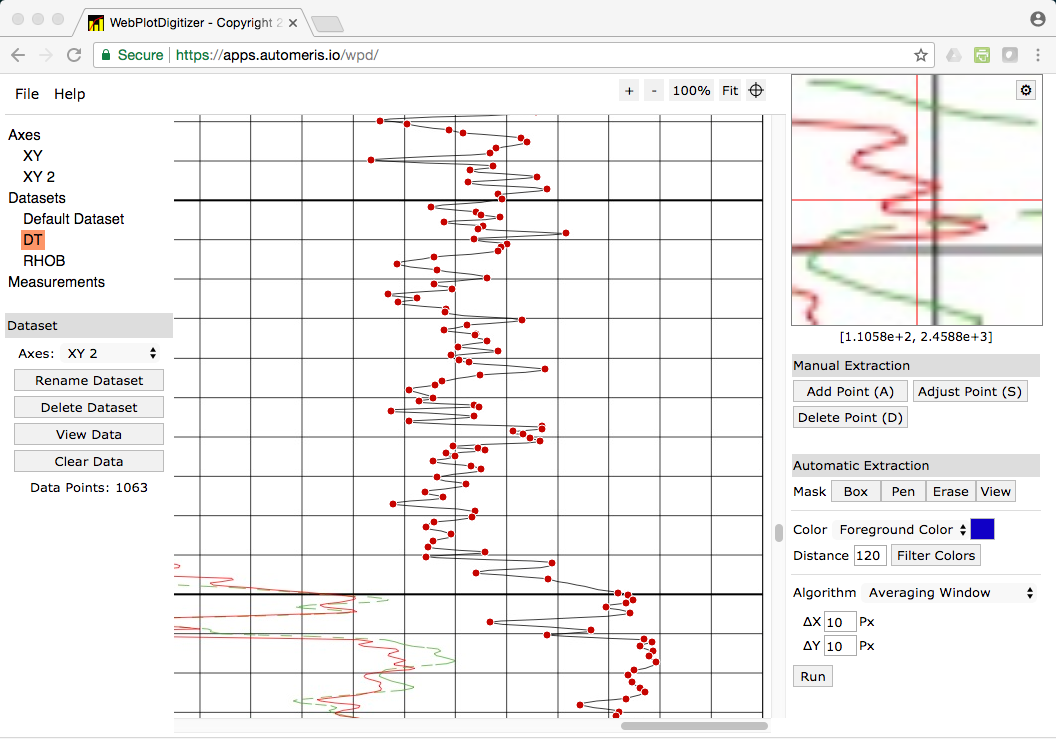

In [8]:
img('imagens/Web-plot-digitizer.png')

Now, I import the digitized data here.

In [9]:
file_data = np.loadtxt('Resultados/RJS-426/DT_digitalizado.txt', usecols=(0,1),skiprows=1)
print(file_data)

[[  122.8935  1788.7733]
 [  117.2239  1789.6662]
 [  122.8935  1790.552 ]
 ..., 
 [   51.7302  2519.3345]
 [   51.7302  2520.8591]
 [   52.5122  2521.2397]]


In [10]:
file_data[0,1]    # checking the first value for the DEPTH of the log

1788.7733000000001

In [11]:
DEPT_DT = file_data[:,1]    # assigning the second collumn to a parameter
DEPT_DT

array([ 1788.7733,  1789.6662,  1790.552 , ...,  2519.3345,  2520.8591,
        2521.2397])

In [12]:
log = las.LASReader('perfis/1RJS_0426__RJ_1RJS_0426__RJ_BCS_00027.las')     # reading the DT log I already have
log.data

array([( 2521.0496,  53.3044), ( 2521.202 ,  53.5918),
       ( 2521.3544,  53.822 ), ..., ( 3669.6884,  67.23  ),
       ( 3669.8408,  67.1271), ( 3669.9932,  67.1921)],
      dtype=[('DEPT', '<f8'), ('DT', '<f8')])

In [13]:
# note that this log starts at the DEPTH 2521.0496 

In [14]:
log.step     # sampling interval of the logs stores at the .las file

0.1524

In [15]:
log.start    # value of the starting DEPTH of the log

2521.0496

## Resampling the data according to the log.step

In [16]:
a = np.arange(log.start-log.step, file_data[0,1], -log.step)
a

array([ 2520.8972,  2520.7448,  2520.5924, ...,  1789.2248,  1789.0724,
        1788.92  ])

In [17]:
DEPT = np.sort(a, axis=None)
DEPT

array([ 1788.92  ,  1789.0724,  1789.2248, ...,  2520.5924,  2520.7448,
        2520.8972])

In [18]:
DEPT.size

4804

Now, using spline algorithm from Scipy module I will atribute intermediate values for the interval resampled. 


In [19]:
DEPT_DT = file_data[:,1]    # Depth parameter distributed unevenly that came from the file digitized
DEPT_DT.size   # number os samples

1062

In [20]:
DEPT_DT

array([ 1788.7733,  1789.6662,  1790.552 , ...,  2519.3345,  2520.8591,
        2521.2397])

In [21]:
DT = file_data[:,0]         # DT values from the digitized log
DT

array([ 122.8935,  117.2239,  122.8935, ...,   51.7302,   51.7302,
         52.5122])

In [22]:
DT.size

1062

## Interpolation Spline 1d 

In [23]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = DEPT_DT
y = DT
f = interpolate.interp1d(x, y)

In [ ]:
xnew = DEPT      # profundidade reamostrada
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.figure(figsize=(10,150))
plt.plot(y, x, 'o', ynew, xnew, 'o')
plt.show()

In [ ]:
DT_upsampled = ynew
DT_upsampled[:15]

In [ ]:
DT[:15]

In [ ]:
DEPT_DT[:15]

In [ ]:
DEPT[:15]

Ready! Now I can calculate the acoustic impedance using this DT log and the RHOB log I already have.

I will export the parameters in a txt file.

In [ ]:
Depth = np.array([DEPT])
Depth.T

In [ ]:
dt = np.array([DT_upsampled])
dt.T

In [ ]:
DT_log = np.concatenate((Depth.T, dt.T), axis=1)
DT_log

In [ ]:
np.savetxt('Resultados/RJS-426/DT_log_digitized_RJS-426.txt', DT_log, fmt='%s', delimiter=' ', newline='\n', header='', footer='', comments='# ') 